In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

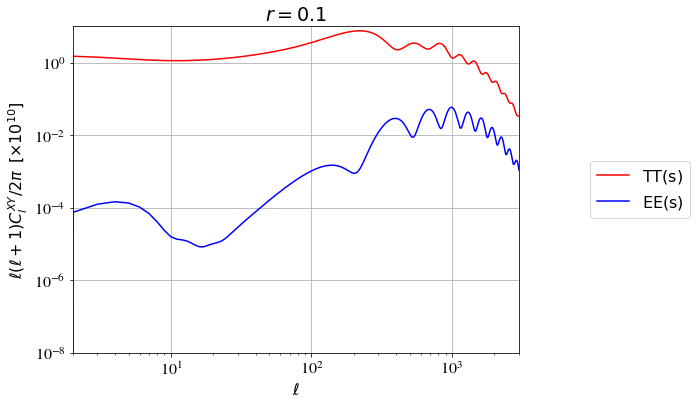

In [14]:
common_settings = {
        'output': 'tCl, pCl, lCl',
        'h': 0.67556,
        'omega_b': 0.022032,
        'omega_cdm':0.120038,
        'A_s':2.215e-9,
        'tau_reio':0.0925,
        'l_max_scalars':3000
        
}
###################

#LLAMAMOS A CLASS

###################

M = Class()
M.set(common_settings)
M.set({'output': 'tCl, pCl, lCl',  'modes': 's', 'lensing': 'yes', 'n_s':0.9619, 'l_max_scalars':3000})
M.compute()
cls = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.struct_cleanup()
M.empty()

#Comenzamos a graficar funciones 

plt.xlim([2,3000])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()


ell = cl_lensed['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi

plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))